<a href="https://colab.research.google.com/github/FUHAR-GARG/project-bikesharingfinal/blob/main/project_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Predict Bike Sharing Demand with AutoGluon Template***
Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit ? markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

File-> Export Notebook As... -> Export Notebook as HTML

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

Step 1: Create an account with Kaggle
Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

Open account settings. kaggle1.png kaggle2.png
Scroll down to API and click Create New API Token. kaggle3.png kaggle4.png
Open up kaggle.json and use the username and key. kaggle5.png
Step 2: Download the Kaggle dataset using the kaggle python library
Open up Sagemaker Studio and use starter template
Notebook should be using a ml.t3.medium instance (2 vCPU + 4 GiB)
Notebook should be using kernal: Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)

***Install packages***

In [1]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install pydantic==1.10.3
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 7.7 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
  Using cached setuptools-69.5.1-py3-none-any.whl.metadata (6.2 kB)
Using cached setuptools-69.5.1-py3-none-any.whl (894 kB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.7.2
    Uninstalling setuptools-67.7.2:
      Successfully uninstalled setuptools-67.7.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.0/142.0 kB 2.4 MB/s eta 0:00:00
Reason for being yanked: See https://github.com/pydantic/pydantic/issues/4885
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 15.2 MB/s eta 0:00:00
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.7.0
    Uninstalling pydantic-2.7.0:
      Successfully uninstalled pydantic-2.7.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 17.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 12.2 MB/s eta 0:00:00
  Created wheel for bokeh: filename=bokeh-2.0.1-py3-none-any.whl size=9080016 sha256=7598253eb4a478da3416971051e87dd41be43f8908297b42e3d5c637bdb2c8bb
  Stored in directory: /root/.cache/pip/wheels/be/b4/d8/7ce778fd6e637bea03a561223a77ba6649aff8168e3c613754
Successfully built bokeh
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20.3
    Uninstalling graphviz-0.20.3:
      

In [4]:
# Dowmload and unzip 'Bike Sharing Demand' dataset from Kaggle

# Install Kaggle API client
!pip install -q Kaggle

# Upload Kaggle API token (json file) -- (Uncomment) Only for Google Colab (For AWS Sagemaker upload 'kaggle.json')
# from google.colab import files
# files.upload()

# create a kaggle directory
!mkdir ~/.kaggle          # (-----------------------------------------   Uncomment - For first time only)

# copy 'kaggle.json' (Kaggle API Token) to the folder we have created
!cp kaggle.json ~/.kaggle/

# Authorize permissions for the json to act
!chmod 600 ~/.kaggle/kaggle.json

# Download the Bike Sharing Demand dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand

# # Unzip Dataset (Over-write to avoid error, if the dataset pre-exists)
!unzip -o bike-sharing-demand.zip    # -o: over-writes if the file pre-exists

mkdir: cannot create directory ‘/root/.kaggle’: File exists
cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [5]:
import pandas as pd
import numpy as np
from autogluon.tabular import TabularPredictor

In [6]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv("train.csv",parse_dates=["datetime"])

In [7]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [8]:
# Train dataset summary
train.describe()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454


In [9]:
# Information regarding datatypes of variables within the train
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [10]:
# Check for null values in train data
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [11]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv("test.csv",parse_dates=["datetime"])
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [12]:
# Check for null values in test data
test.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

In [13]:
# Shape of train and test datasets
print("Train Dataset Shape : ", train.shape)
print("Test Dataset Shape  : ", test.shape)

Train Dataset Shape :  (10886, 12)
Test Dataset Shape  :  (6493, 9)


In [14]:
# Same thing as train and test dataset
submission = pd.read_csv("sampleSubmission.csv",parse_dates=["datetime"])
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [15]:
# Checking all the features and target variable in the dataset
print("Columns in Train Dataset:\n", train.columns)
print("\nColumns in Test Dataset:\n", test.columns)

Columns in Train Dataset:
 Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

Columns in Test Dataset:
 Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed'],
      dtype='object')


In [16]:
# Variables not present in test dataset
print("Variables that are not present in the test dataset: ")
list(set(train.columns).difference(set(test.columns)))

Variables that are not present in the test dataset: 


['casual', 'registered', 'count']

In [17]:
# Requirements: For AutoGluon's Tabular Predictions
eval_metric = 'root_mean_squared_error'
label = 'count'
ignored_columns = ["casual", "registered"]   # Ignored columns while training
train_data = train                           # 'casual' and 'registered' columns are already dropped/ignored
time_limit = 600                             # 10 minutes -> 60*10 = 600 seconds
presets = "best_quality"                     # auto_stack=True

In [18]:
predictor = TabularPredictor(label=label,
                             problem_type= 'regression',
                             eval_metric=eval_metric,
                             learner_kwargs={'ignored_columns': ignored_columns}).fit(
                                                                           train_data = train_data,
                                                                           time_limit=time_limit,
                                                                           presets=presets)

No path specified. Models will be saved in: "AutogluonModels/ag-20240429_204851"
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 600 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20240429_204851/ds_sub_fit/sub_fit_ho.
Running the sub-fit in a ray process to avoid memory leakage.
Spend 211 seconds

In [19]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -53.131161  root_mean_squared_error      26.021009  384.214343                0.001178           0.038744            3       True         11
1   RandomForestMSE_BAG_L2  -53.420931  root_mean_squared_error      20.348001  284.918622                0.756013          45.355665            2       True         10
2          LightGBM_BAG_L2  -55.067047  root_mean_squared_error      19.857922  271.690039                0.265934          32.127082            2       True          9
3        LightGBMXT_BAG_L2  -60.622832  root_mean_squared_error      24.997884  306.692852                5.405896          67.129895            2       True          8
4    KNeighborsDist_BAG_L1  -84.125061  root_mean_squared_error       0.068699    0.050455   

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -131.46090891834504,
  'LightGBM_BAG_L1': -131.054161598899,
  'RandomForestMSE_BAG_L1': -116.54835939455667,
  'CatBoost_BAG_L1': -131.3037090144586,
  'WeightedEnsemble_L2': -84.12506123181602,
  'LightGBMXT_BAG_L2': -60.62283219973871,
  'LightGBM_BAG_L2': -55.0670469

In [20]:
# Leaderboard dataframe
leaderboard_df = pd.DataFrame(predictor.leaderboard(silent=True))
leaderboard_df

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L3,-53.131161,root_mean_squared_error,26.021009,384.214343,0.001178,0.038744,3,True,11
1,RandomForestMSE_BAG_L2,-53.420931,root_mean_squared_error,20.348001,284.918622,0.756013,45.355665,2,True,10
2,LightGBM_BAG_L2,-55.067047,root_mean_squared_error,19.857922,271.690039,0.265934,32.127082,2,True,9
3,LightGBMXT_BAG_L2,-60.622832,root_mean_squared_error,24.997884,306.692852,5.405896,67.129895,2,True,8
4,KNeighborsDist_BAG_L1,-84.125061,root_mean_squared_error,0.068699,0.050455,0.068699,0.050455,1,True,2
5,WeightedEnsemble_L2,-84.125061,root_mean_squared_error,0.070195,0.120853,0.001497,0.070398,2,True,7
6,KNeighborsUnif_BAG_L1,-101.546199,root_mean_squared_error,0.066764,0.056772,0.066764,0.056772,1,True,1
7,RandomForestMSE_BAG_L1,-116.548359,root_mean_squared_error,0.643205,19.086476,0.643205,19.086476,1,True,5
8,LightGBM_BAG_L1,-131.054162,root_mean_squared_error,2.472307,40.264584,2.472307,40.264584,1,True,4
9,CatBoost_BAG_L1,-131.303709,root_mean_squared_error,0.171068,87.679535,0.171068,87.679535,1,True,6


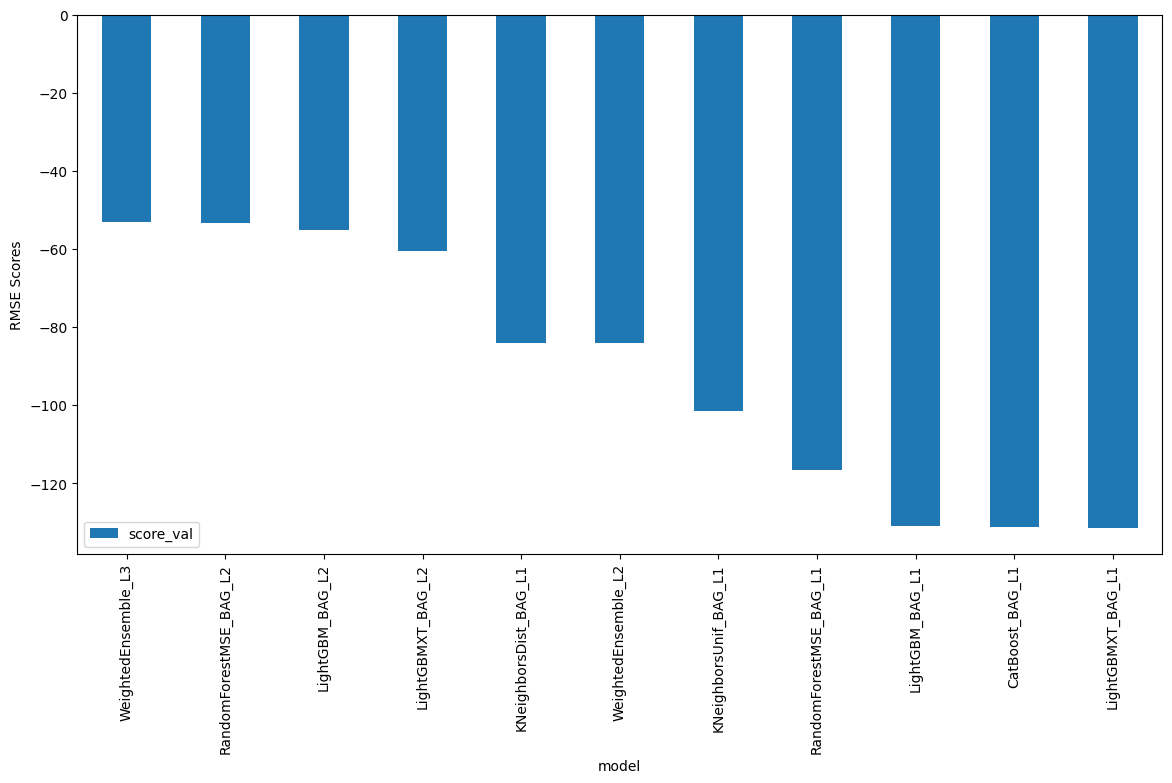

In [21]:
# Output the model's `score_val` in a bar chart to compare performance
import matplotlib.pyplot as plt
leaderboard_df.plot(kind="bar", x="model", y="score_val", figsize=(14, 7))
plt.ylabel("RMSE Scores")
plt.show()

In [22]:
predictions = predictor.predict(test)
predictions.head()

0    23.580959
1    42.980911
2    45.958984
3    50.052414
4    52.518047
Name: count, dtype: float32

In [23]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean      100.440613
std        89.789894
min         3.127235
25%        19.909561
50%        63.769463
75%       168.559891
max       366.157104
Name: count, dtype: float64

In [24]:
# How many negative values do we have?

# Rechecking the predictions
negative_pred_count = predictions.apply(lambda x: 1 if x<0 else 0)

pred_pos_count = (negative_pred_count==0).sum()
pred_neg_count = (negative_pred_count==1).sum()

print("Total predictions                :", len(predictions.index))
print("Total positive prediction values :", pred_pos_count)
print("Total negative prediction values :", pred_neg_count)

Total predictions                : 6493
Total positive prediction values : 6493
Total negative prediction values : 0


In [25]:
# Set them to zero
predictions[predictions<0] = 0    # (In case, if negative values exist in the predictions, set them to 0)

# Rechecking, if no predictions are less than 0
negative_pred_count = predictions.apply(lambda x: 1 if x<0 else 0)
pred_neg_count = (negative_pred_count==1).sum()
print(f"No. of negative predictions: {pred_neg_count}")
print("All negative values in the predictions (if any) are set to zero successfully.")

No. of negative predictions: 0
All negative values in the predictions (if any) are set to zero successfully.


In [26]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [27]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [28]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 3

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


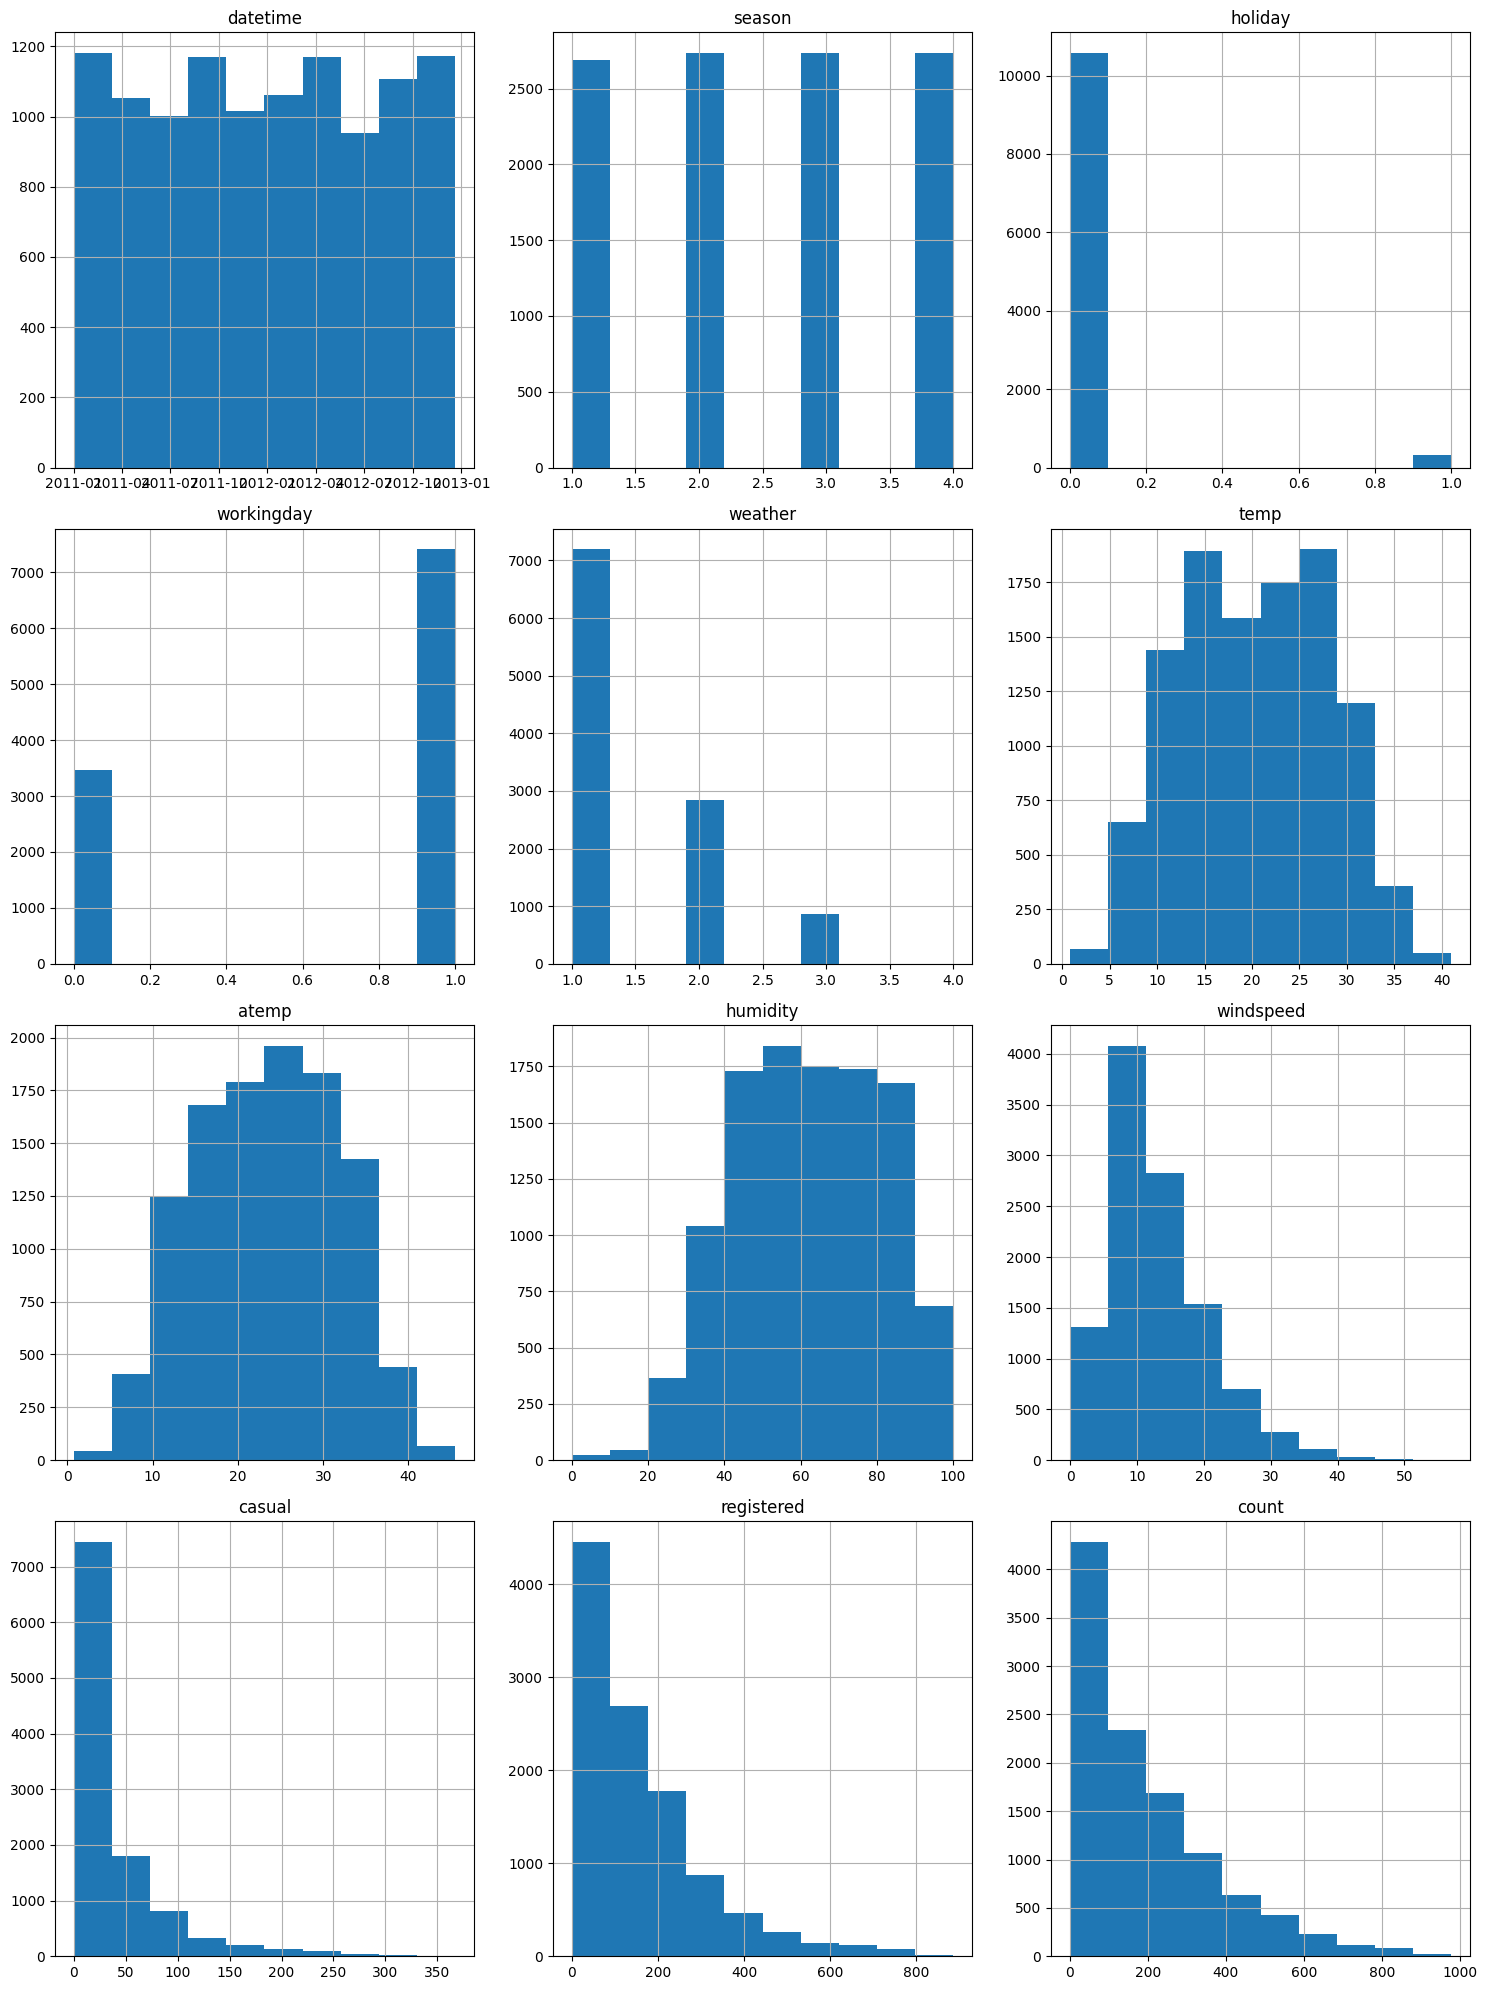

In [29]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist(figsize=(15,20))  # Note: 'casual' and 'registered' are ignored during training as they are absent in test data

plt.tight_layout()
plt.show()

<Figure size 1800x1800 with 0 Axes>

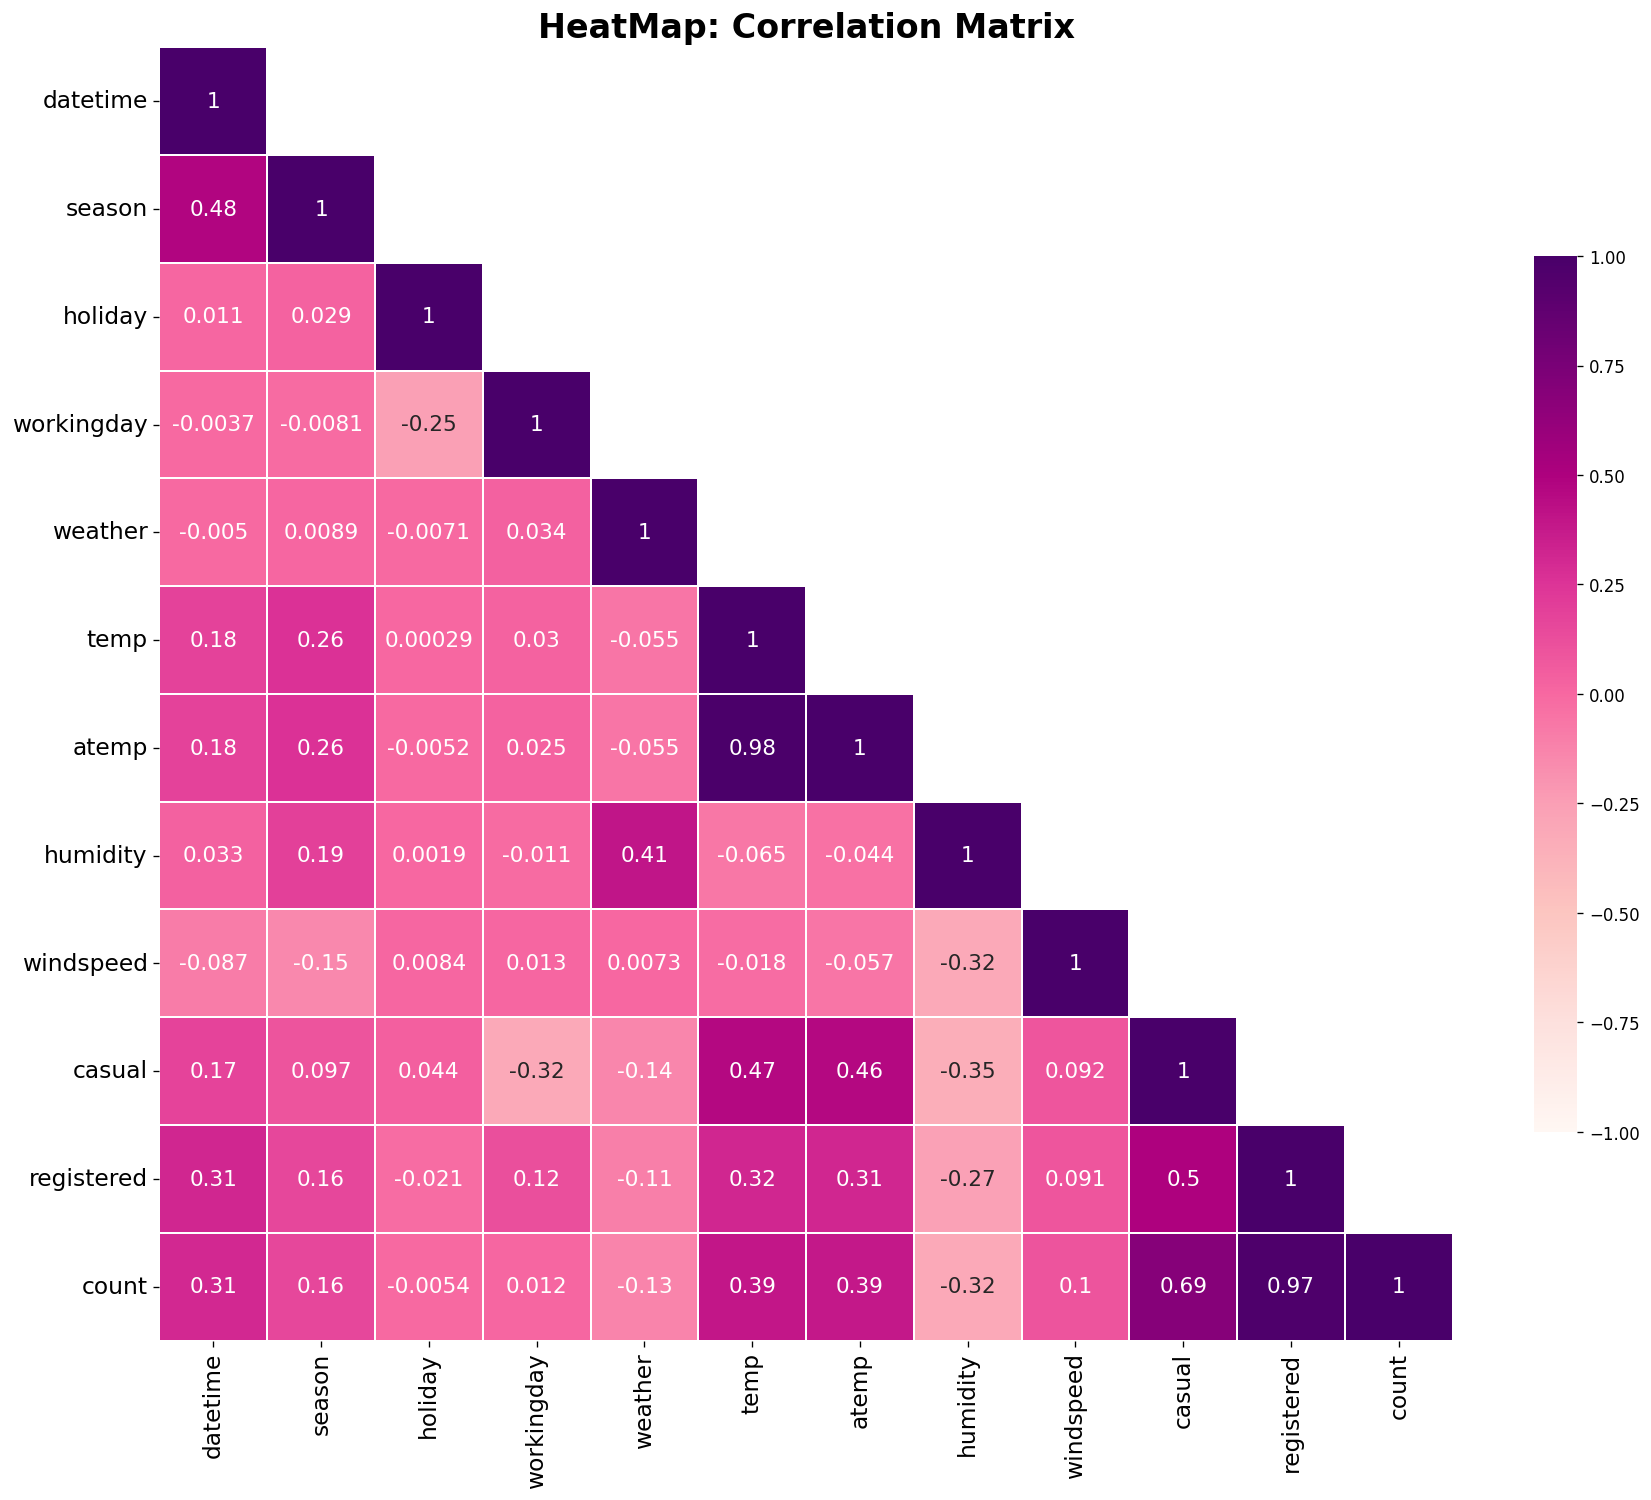

In [30]:
## Let's check the correlation between these variables to see if there is pattern between variables

#Plotting a heatmap to understand the correlation between the independent variables
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (15,15), dpi=120)
corr_data = train.copy()

corr_matrix = corr_data.corr()
f, ax_corr1 = plt.subplots(figsize=(15, 15), dpi=120)
# Create a mask to eliminate redundant repetitive correlations
corr_mask = np.array(corr_matrix)
corr_mask[np.tril_indices_from(corr_mask)] = False

# Plot heatmap using correlation matrix and mask
ax_corr1 = sns.heatmap(corr_matrix, cmap= 'RdPu', cbar_kws={"shrink": .5}, vmin= -1, vmax=1, center=0,
            square=True, mask=corr_mask, annot=True, linewidths=0.01, annot_kws={"size":13})
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14, rotation=0)
plt.title("HeatMap: Correlation Matrix", fontsize=20, fontweight='bold')
plt.tight_layout()
plt.autoscale()
plt.show()


In [31]:
# Checking 'datetime' feature in train data
train['datetime'].head()

0   2011-01-01 00:00:00
1   2011-01-01 01:00:00
2   2011-01-01 02:00:00
3   2011-01-01 03:00:00
4   2011-01-01 04:00:00
Name: datetime, dtype: datetime64[ns]

In [32]:
# Splitting the 'datetime' feature in train data
train["year"] = train["datetime"].dt.year
train["month"] = train["datetime"].dt.month
train["day"] = train["datetime"].dt.dayofweek  # Note: day -> dayofweek (0->Monday, 6->Sunday)
train["hour"] = train["datetime"].dt.hour
train.drop(["datetime"], axis=1, inplace=True)     # Drop 'datetime' feature
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,5,0
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,5,1
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,5,2
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,5,3
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,5,4


In [33]:
# Splitting the 'datetime' feature in test data
test["year"] = test["datetime"].dt.year
test["month"] = test["datetime"].dt.month
test["day"] = test["datetime"].dt.dayofweek  # Note: day -> dayofweek (0->Monday, 6->Sunday)
test["hour"] = test["datetime"].dt.hour
test.drop(["datetime"], axis=1, inplace=True)   # Drop 'datetime' feature
test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour
0,1,0,1,1,10.66,11.365,56,26.0027,2011,1,3,0
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,3,1
2,1,0,1,1,10.66,13.635,56,0.0000,2011,1,3,2
3,1,0,1,1,10.66,12.880,56,11.0014,2011,1,3,3
4,1,0,1,1,10.66,12.880,56,11.0014,2011,1,3,4


In [34]:
# Recheck datatype of features in the train dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  int64  
 9   registered  10886 non-null  int64  
 10  count       10886 non-null  int64  
 11  year        10886 non-null  int32  
 12  month       10886 non-null  int32  
 13  day         10886 non-null  int32  
 14  hour        10886 non-null  int32  
dtypes: float64(3), int32(4), int64(8)
memory usage: 1.1 MB


In [35]:
# Convert 'int' feature columns that are categorical in nature to 'category' type
train["season"] = train["season"].astype("category")
train["weather"] = train["weather"].astype("category")

test["season"] = test["season"].astype("category")
test["weather"] = test["weather"].astype("category")

In [36]:
# View the new features
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,5,0
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,5,1
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,5,2
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,5,3
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,5,4


In [37]:
# Recheck datatypes
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      10886 non-null  category
 1   holiday     10886 non-null  int64   
 2   workingday  10886 non-null  int64   
 3   weather     10886 non-null  category
 4   temp        10886 non-null  float64 
 5   atemp       10886 non-null  float64 
 6   humidity    10886 non-null  int64   
 7   windspeed   10886 non-null  float64 
 8   casual      10886 non-null  int64   
 9   registered  10886 non-null  int64   
 10  count       10886 non-null  int64   
 11  year        10886 non-null  int32   
 12  month       10886 non-null  int32   
 13  day         10886 non-null  int32   
 14  hour        10886 non-null  int32   
dtypes: category(2), float64(3), int32(4), int64(6)
memory usage: 957.3 KB


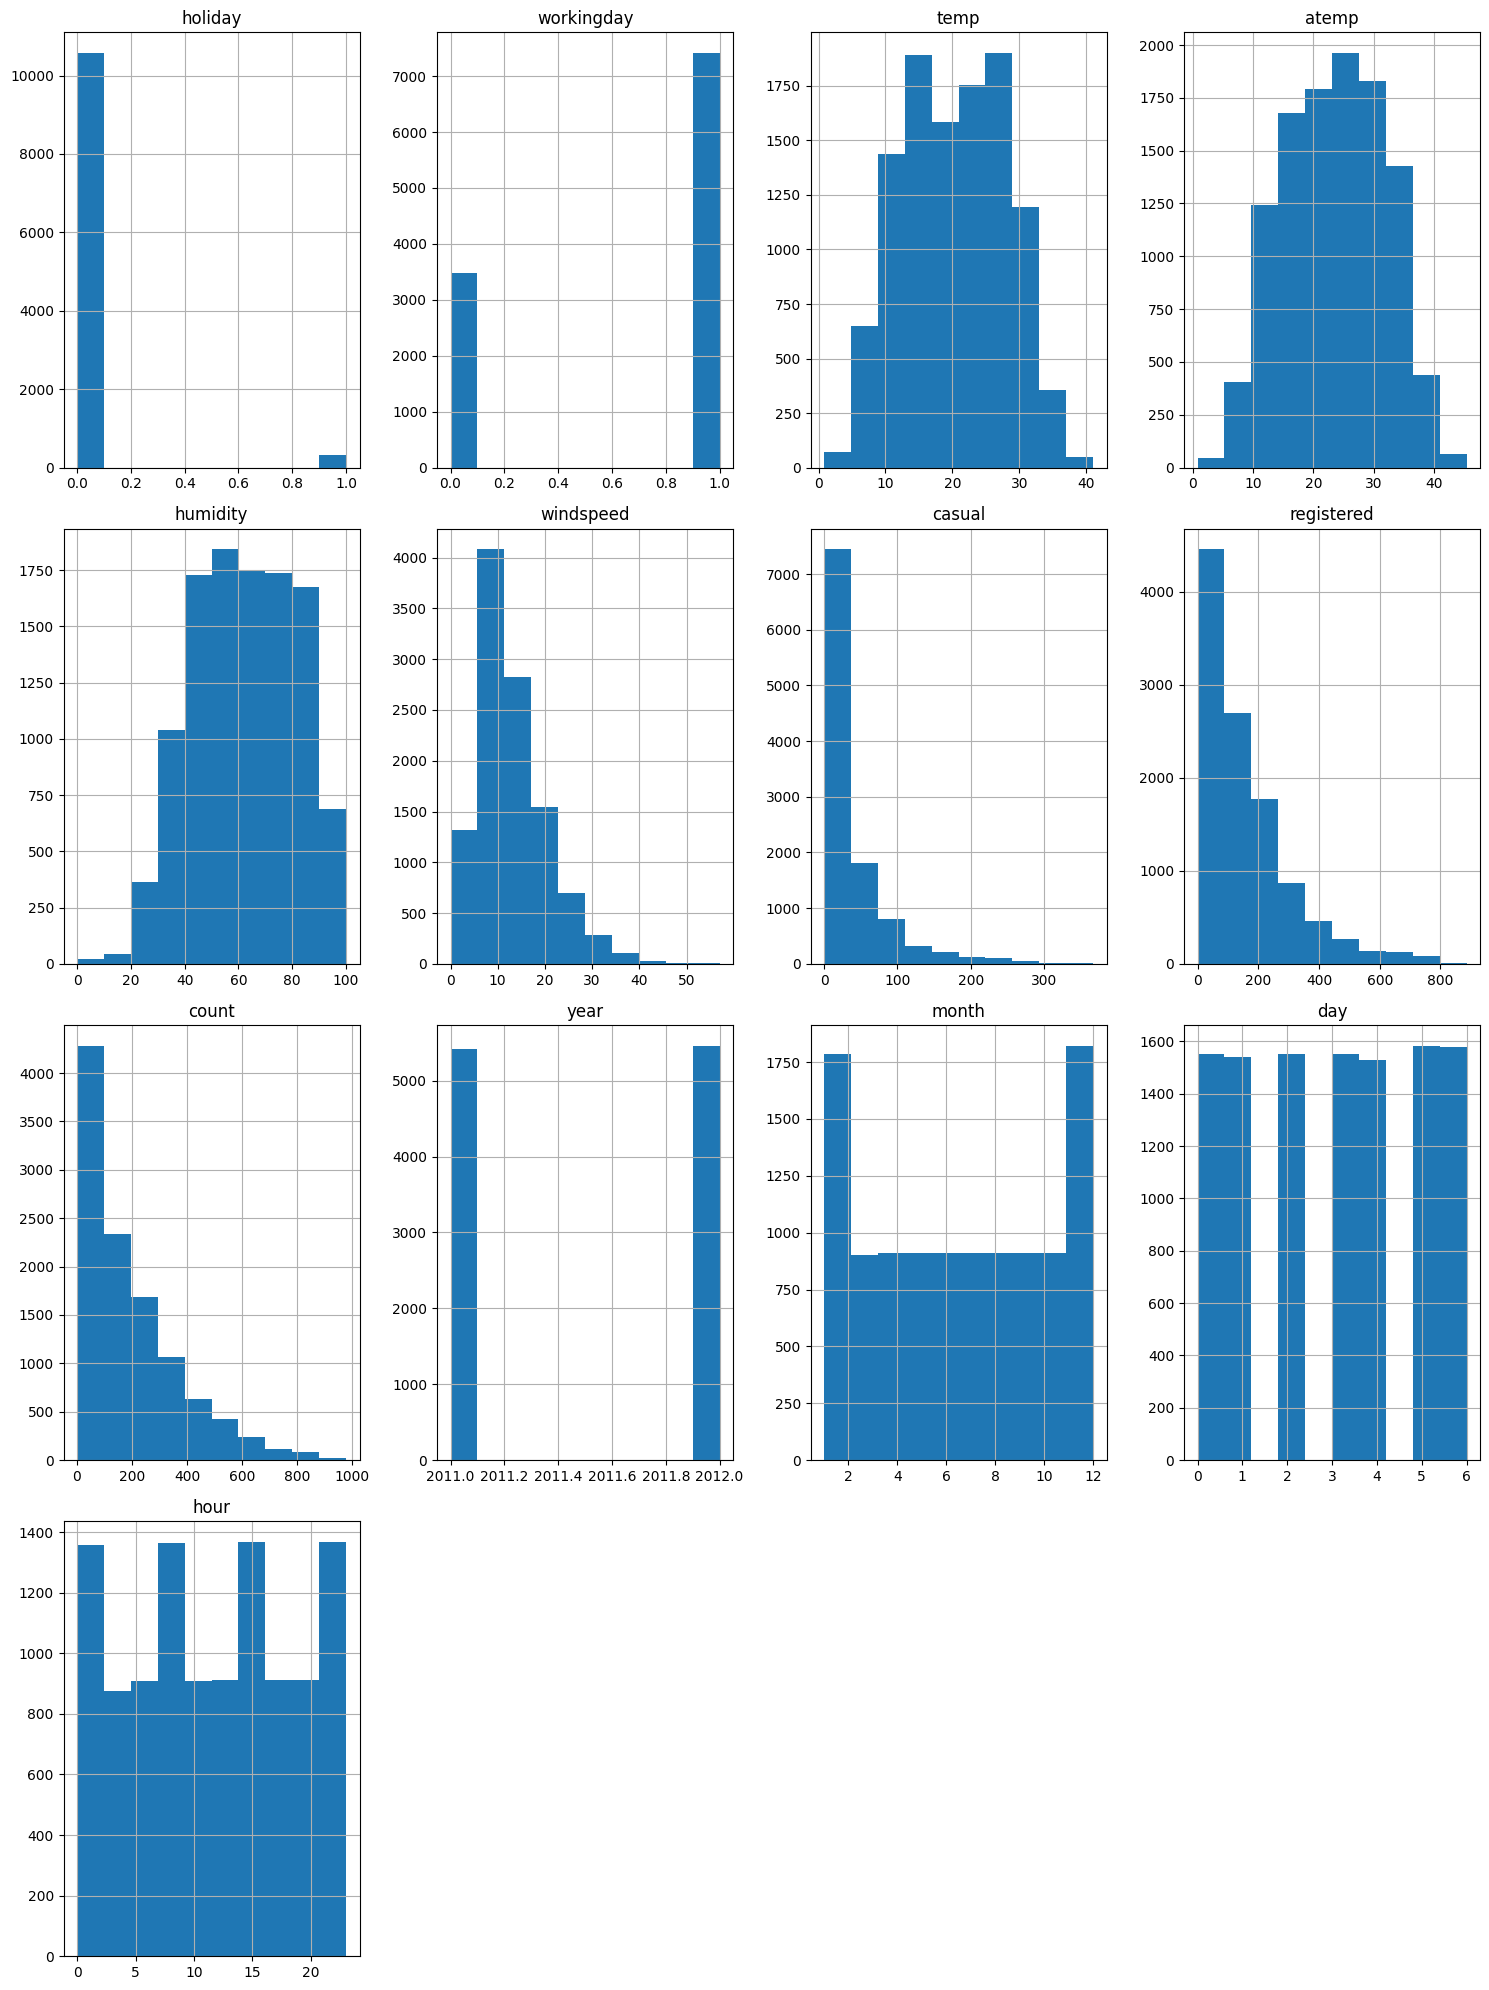

In [38]:
# View histogram of all features again now with the hour feature
train.hist(figsize=(15,20))  # Note: 'casual' and 'registered' are ignored during training as they are absent in test data

plt.tight_layout()
plt.show()

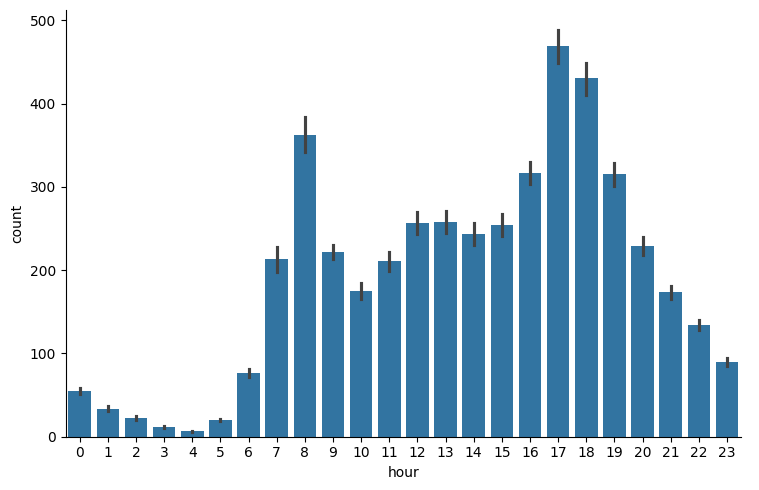

In [39]:
# Variation in`count` w.r.t `hour`

# Using catplot: 'kind':bar makes sure to take value of 'count' for every record into account
sns.catplot(x="hour",y="count",data=train,kind='bar',height=5,aspect=1.5)
plt.tight_layout()
plt.show()

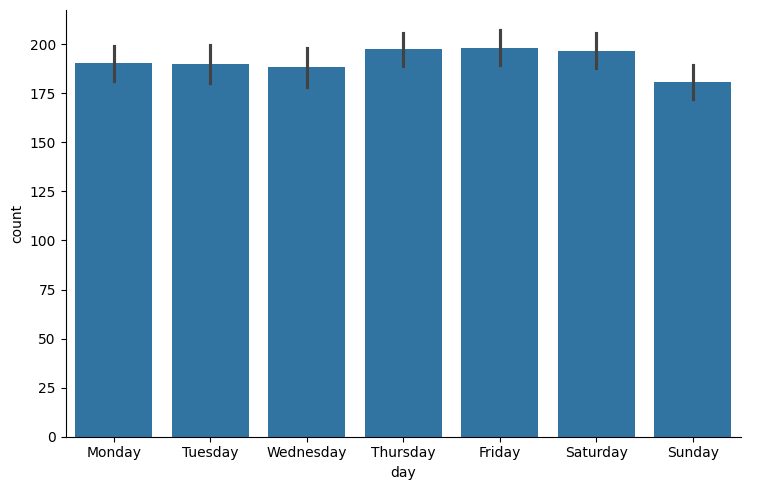

In [40]:
# Variation in`count` w.r.t `day` (dayofweek) [0: Monday -> 6: Sunday]

# Using catplot: 'kind':bar makes sure to take value of 'count' for every record into account
sns.catplot(x="day",y="count",data=train,kind='bar',height=5,aspect=1.5)
plt.tight_layout()
plt.xticks(ticks=range(0,7), labels=["Monday", "Tuesday", "Wednesday",
                                     "Thursday", "Friday", "Saturday", "Sunday"])
plt.show()

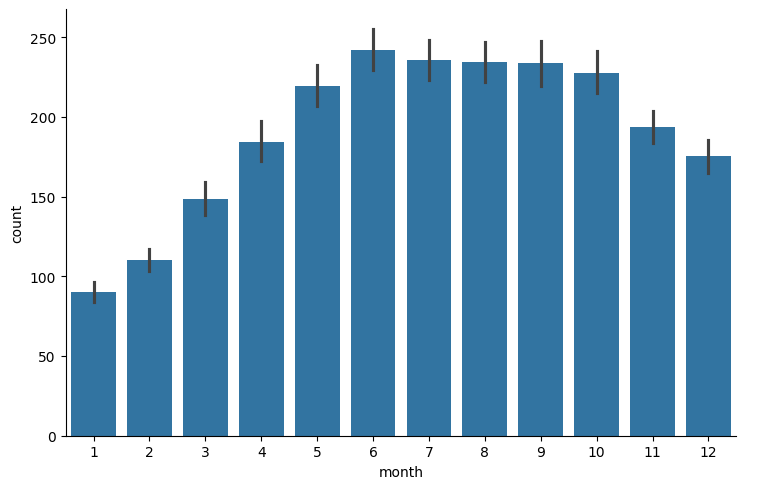

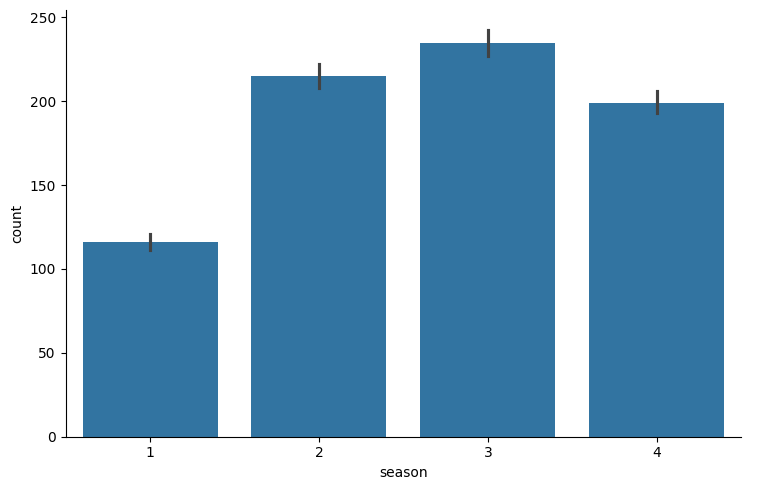

In [41]:
# Variation in`count` w.r.t `month` and 'season'

# Using catplot: 'kind':bar makes sure to take value of 'count' for every record into account
sns.catplot(x="month",y="count",data=train,kind='bar',height=5,aspect=1.5)
sns.catplot(x="season",y="count",data=train,kind='bar',height=5,aspect=1.5)
plt.tight_layout()
plt.show()

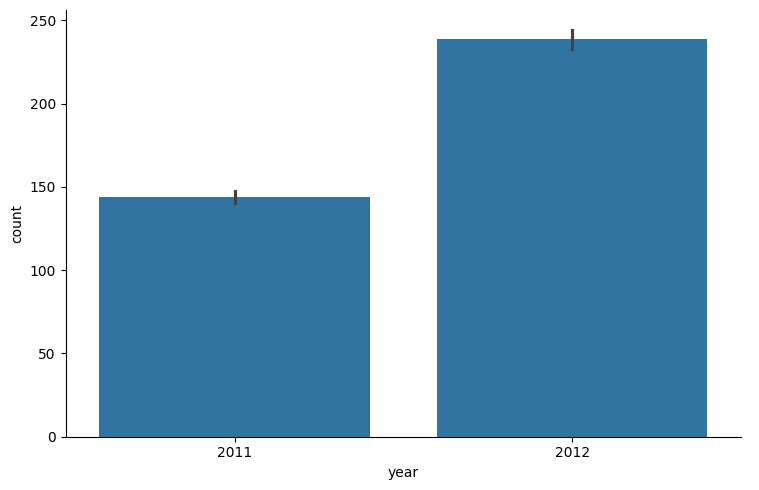

In [42]:
# Variation in`count` w.r.t `year`

# Using catplot: 'kind':bar makes sure to take value of 'count' for every record into account
sns.catplot(x="year",y="count",data=train,kind='bar',height=5,aspect=1.5)
plt.tight_layout()
plt.show()

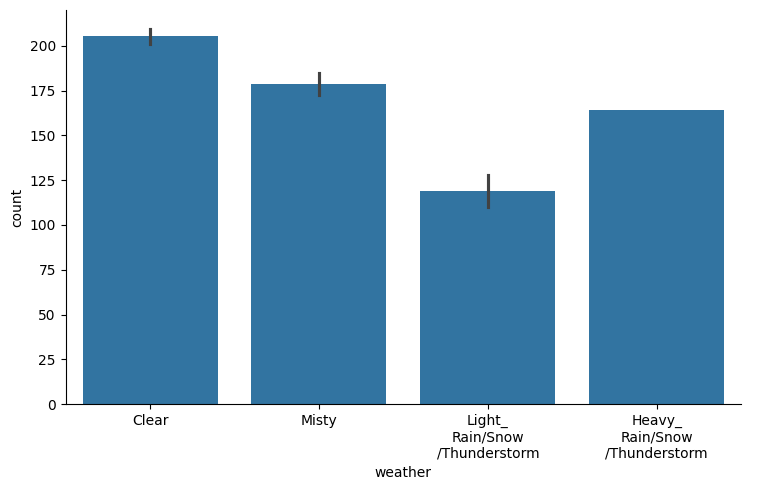

In [43]:
# Variation in`count` w.r.t `weather'

# Using catplot: 'kind':bar makes sure to take value of 'count' for every record into account
sns.catplot(x="weather",y="count",data=train,kind='bar',height=5,aspect=1.5)
plt.xticks(ticks=range(0,4), labels=["Clear","Misty",
                                     "Light_\nRain/Snow\n/Thunderstorm",
                                     "Heavy_\nRain/Snow\n/Thunderstorm"])
plt.tight_layout()
plt.show()

In [44]:
# New feature 'day_type' contains categories 'weekend', 'weekday', or 'holiday' (In Train and Test set)

# Adding features - 'day_type' in train data
train["day_type"]=""
train.loc[(train.holiday==1),"day_type"] = "holiday"
train.loc[((train.holiday==0) & (train.workingday==1)), "day_type"] = "weekday"
train.loc[((train.holiday==0) & (train.workingday==0)), "day_type"] = "weekend"

# Adding features - 'day_type' in test data
test["day_type"]=""
test.loc[(test.holiday==1),"day_type"] = "holiday"
test.loc[((test.holiday==0) & (test.workingday==1)), "day_type"] = "weekday"
test.loc[((test.holiday==0) & (test.workingday==0)), "day_type"] = "weekend"

# Change the datatype to category
train["day_type"] = train["day_type"].astype("category")
test["day_type"] = test["day_type"].astype("category")

train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,day_type
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,5,0,weekend
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,5,1,weekend
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,5,2,weekend
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,5,3,weekend
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,5,4,weekend


In [45]:
# Statistics of all features within the trian data
train.describe()

,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
count,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,0.028569,0.680875,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,2011.501929,6.521495,3.013963,11.541613
std,0.166599,0.466159,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,0.500019,3.444373,2.004585,6.915838
min,0.000000,0.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,2011.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,2011.000000,4.000000,1.000000,6.000000
50%,0.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,2012.000000,7.000000,3.000000,12.000000
75%,0.000000,1.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,2012.000000,10.000000,5.000000,18.000000
max,1.000000,1.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,2012.000000,12.000000,6.000000,23.000000


In [46]:
# Dropping highly correlated independent feature 'atemp' from train and test datasets
train.drop(["atemp"], axis=1, inplace=True)
test.drop(["atemp"], axis=1, inplace=True)

In [47]:
# Checking datatypes of variables
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      10886 non-null  category
 1   holiday     10886 non-null  int64   
 2   workingday  10886 non-null  int64   
 3   weather     10886 non-null  category
 4   temp        10886 non-null  float64 
 5   humidity    10886 non-null  int64   
 6   windspeed   10886 non-null  float64 
 7   casual      10886 non-null  int64   
 8   registered  10886 non-null  int64   
 9   count       10886 non-null  int64   
 10  year        10886 non-null  int32   
 11  month       10886 non-null  int32   
 12  day         10886 non-null  int32   
 13  hour        10886 non-null  int32   
 14  day_type    10886 non-null  category
dtypes: category(3), float64(2), int32(4), int64(6)
memory usage: 883.0 KB


In [48]:
print("(After EDA + Feature Engineering) Train Data Shape : ", train.shape)
print("(After EDA + Feature Engineering) Test Data Shape  : ", test.shape)

(After EDA + Feature Engineering) Train Data Shape :  (10886, 15)
(After EDA + Feature Engineering) Test Data Shape  :  (6493, 12)


In [50]:
# Requirements: (Same settings as that of initial run) For AutoGluon's Tabular Predictions
eval_metric = 'root_mean_squared_error'
label = 'count'
ignored_columns = ["casual", "registered"]   # Ignored columns while training
train_data = train                           # 'casual' and 'registered' columns are already dropped/ignored
time_limit = 600                             # 10 minutes -> 60*10 = 600 seconds
presets = "best_quality"                     # auto_stack=True

In [51]:
predictor_new_features = TabularPredictor(label=label,
                                          problem_type= 'regression',
                                          eval_metric=eval_metric,
                                          learner_kwargs={'ignored_columns': ignored_columns}).fit(
                                                                                           train_data = train_data,
                                                                                           time_limit=time_limit,
                                                                                           presets=presets)

No path specified. Models will be saved in: "AutogluonModels/ag-20240429_211555"
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 600 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20240429_211555/ds_sub_fit/sub_fit_ho.
Running the sub-fit in a ray process to avoid memory leakage.
Spend 175 seconds

In [52]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -34.293211  root_mean_squared_error      38.411225  401.814829                0.002055           0.071951            3       True         12
1      WeightedEnsemble_L2  -34.407428  root_mean_squared_error      36.279787  266.010226                0.001208           0.055534            2       True          7
2          LightGBM_BAG_L2  -34.846242  root_mean_squared_error      36.795203  296.753903                0.158087          30.707457            2       True          9
3          CatBoost_BAG_L2  -35.109719  root_mean_squared_error      36.756043  294.948116                0.118927          28.901670            2       True         11
4        LightGBMXT_BAG_L2  -35.189929  root_mean_squared_error      37.333171  299.312652   

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -113.26164315463612,
  'KNeighborsDist_BAG_L1': -109.84517207130654,
  'LightGBMXT_BAG_L1': -36.7080198842608,
  'LightGBM_BAG_L1': -35.78035548163389,
  'RandomForestMSE_BAG_L1': -39.71723944004303,
  'CatBoost_BAG_L1': -39.07391750125105,
  'WeightedEnsemble_L2': -34.40742813171047,
  'LightGBMXT_BAG_L2':

In [53]:
# Leaderboard dataframe
leaderboard_new_features_df = pd.DataFrame(predictor_new_features.leaderboard(silent=True))
leaderboard_new_features_df

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L3,-34.293211,root_mean_squared_error,38.411225,401.814829,0.002055,0.071951,3,True,12
1,WeightedEnsemble_L2,-34.407428,root_mean_squared_error,36.279787,266.010226,0.001208,0.055534,2,True,7
2,LightGBM_BAG_L2,-34.846242,root_mean_squared_error,36.795203,296.753903,0.158087,30.707457,2,True,9
3,CatBoost_BAG_L2,-35.109719,root_mean_squared_error,36.756043,294.948116,0.118927,28.901670,2,True,11
4,LightGBMXT_BAG_L2,-35.189929,root_mean_squared_error,37.333171,299.312652,0.696054,33.266206,2,True,8
5,RandomForestMSE_BAG_L2,-35.308446,root_mean_squared_error,37.436102,308.867545,0.798986,42.821099,2,True,10
6,LightGBM_BAG_L1,-35.780355,root_mean_squared_error,5.128363,53.638984,5.128363,53.638984,1,True,4
7,LightGBMXT_BAG_L1,-36.708020,root_mean_squared_error,29.924153,112.404155,29.924153,112.404155,1,True,3
8,CatBoost_BAG_L1,-39.073918,root_mean_squared_error,0.236355,84.642404,0.236355,84.642404,1,True,6
9,RandomForestMSE_BAG_L1,-39.717239,root_mean_squared_error,0.989708,15.269149,0.989708,15.269149,1,True,5


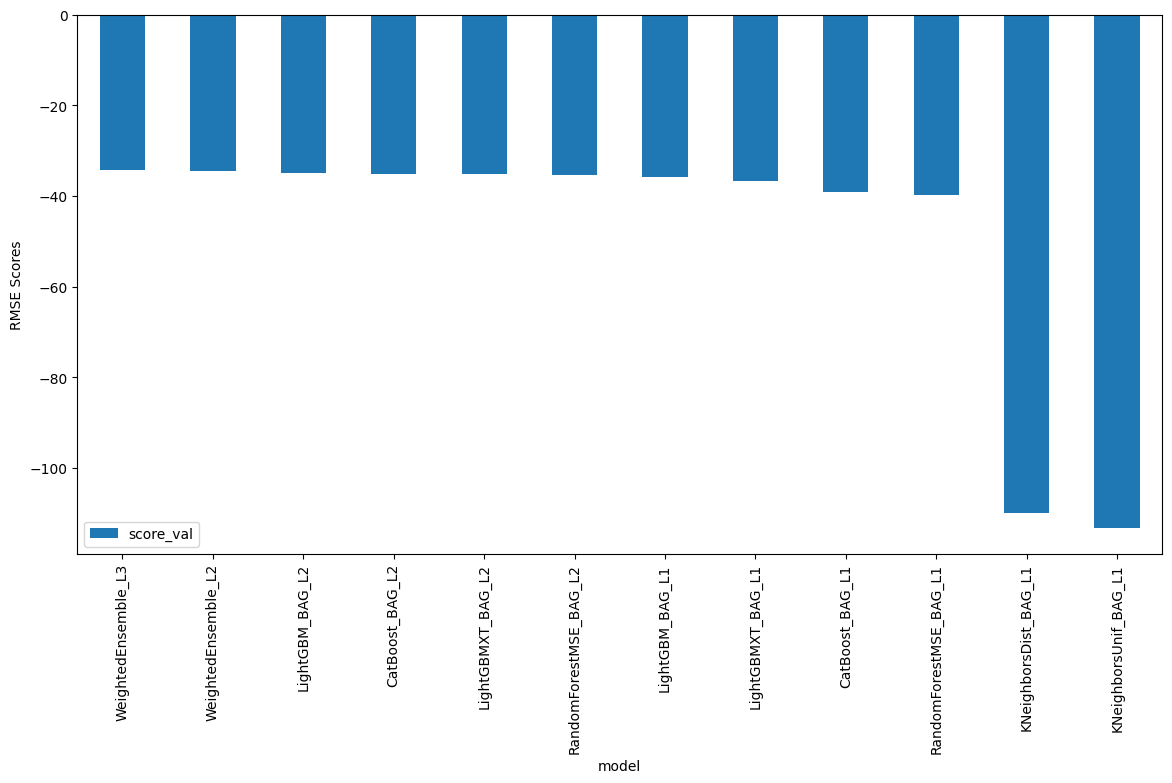

In [54]:
# Output the model's `score_val` in a bar chart to compare performance
import matplotlib.pyplot as plt
leaderboard_new_features_df.plot(kind="bar", x="model", y="score_val", figsize=(14, 7))
plt.ylabel("RMSE Scores")
plt.show()

In [55]:
predictions_new_features = predictor_new_features.predict(test)
predictions_new_features.head()

0    13.912195
1     5.716333
2     4.380254
3     3.492359
4     3.465604
Name: count, dtype: float32

In [56]:
# Describe the `predictions_new_features` series to see if there are any negative values
predictions_new_features.describe()

count    6493.000000
mean      190.230850
std       174.283142
min       -10.076773
25%        45.218258
50%       148.761887
75%       281.367920
max       912.086487
Name: count, dtype: float64

In [57]:
# How many negative values do we have?

# Rechecking the predictions in predictions_new_features
negative_pred_count = predictions_new_features.apply(lambda x: 1 if x<0 else 0)

pred_pos_count = (negative_pred_count==0).sum()
pred_neg_count = (negative_pred_count==1).sum()

print("Total predictions                :", len(predictions_new_features.index))
print("Total positive prediction values :", pred_pos_count)
print("Total negative prediction values :", pred_neg_count)

Total predictions                : 6493
Total positive prediction values : 6471
Total negative prediction values : 22


In [58]:
# Remember to set all negative values to zero
predictions_new_features[predictions_new_features<0] = 0    # (In case, if negative values exist in the predictions_new_features, set them to 0)

# Rechecking, if no predictions are less than 0
negative_pred_count = predictions_new_features.apply(lambda x: 1 if x<0 else 0)
pred_neg_count = (negative_pred_count==1).sum()
print(f"No. of negative predictions: {pred_neg_count}")
print("All negative values in the predictions (if any) are set to zero successfully.")

No. of negative predictions: 0
All negative values in the predictions (if any) are set to zero successfully.


In [59]:
# Same thing as train and test dataset
submission_new_features = pd.read_csv('sampleSubmission.csv', parse_dates = ['datetime'])
submission_new_features.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [60]:
# Same submitting predictions
submission_new_features["count"] = predictions_new_features
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [61]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [62]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 4

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [63]:
# Requirements: (Same settings as initial run) For AutoGluon's Tabular Predictions
eval_metric = 'root_mean_squared_error'
label = 'count'
ignored_columns = ["casual", "registered"]   # Ignored columns while training
train_data = train                           # 'casual' and 'registered' columns are already dropped/ignored
time_limit = 600                             # 10 minutes -> 60*10 = 600 seconds
presets = "optimize_for_deployment"

In [69]:
import autogluon as ag
from autogluon.tabular import TabularPredictor
from hyperopt import hp

nn_options = {
    'num_epochs': 5,
    'learning_rate': hp.loguniform('lr', 1e-4, 1e-2, default=5e-4),
    'activation': hp.choice('activation', ['relu', 'softrelu', 'tanh']),
    'dropout_prob': hp.uniform('dropout_prob', 0.0, 0.5, default=0.1)
}

gbm_options = [
    {
        'extra_trees': True,
        'num_boost_round': hp.quniform('num_boost_round', 100, 500, 1),
        'num_leaves': hp.quniform('num_leaves', 25, 64, 1),
        'ag_args': {'name_suffix': 'XT'}
    },
    {},
    'GBMLarge'
]

hyperparameters = {
    'GBM': gbm_options,
    'NN_TORCH': nn_options,
}

num_trials = 20
search_strategy = 'auto'
scheduler = 'local'

hyperparameter_tune_kwargs = {
    'num_trials': num_trials,
    'scheduler': scheduler,
    'searcher': search_strategy,
}

predictor_new_hpo = TabularPredictor(
    label='count',
    problem_type='regression',
    eval_metric='root_mean_squared_error',
    learner_kwargs={'ignored_columns': ignored_columns}
).fit(
    train_data=train,
    time_limit=time_limit,
    presets=presets,
    hyperparameters=hyperparameters,
    hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
    refit_full='best'
)

No path specified. Models will be saved in: "AutogluonModels/ag-20240429_213841"
Presets specified: ['optimize_for_deployment']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20240429_213841"
=================== System Info ===================
AutoGluon Version:  1.1.0
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sat Nov 18 15:31:17 UTC 2023
CPU Count:          2
Memory Avail:       10.11 GB / 12.67 GB (79.8%)
Disk Space Avail:   74.66 GB / 107.72 GB (69.3%)
Train Data Rows:    10886
Train Data Columns: 14
Label Column:       count
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Dropping user-specified ignored columns: ['casual', 'registered']
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    10351.86 MB
	Train Data (Original)  Memory Usage: 0.61 MB (0.0% of available 

  0%|          | 0/20 [00:00<?, ?it/s]

[1000]	valid_set's rmse: 38.8412
[1000]	valid_set's rmse: 39.722
[1000]	valid_set's rmse: 39.5199
[2000]	valid_set's rmse: 38.3691
[3000]	valid_set's rmse: 38.1532
[4000]	valid_set's rmse: 38.1416
[5000]	valid_set's rmse: 38.1845
[1000]	valid_set's rmse: 39.0485
[1000]	valid_set's rmse: 39.3696
[2000]	valid_set's rmse: 38.677
[3000]	valid_set's rmse: 38.6376
[1000]	valid_set's rmse: 38.5283
[2000]	valid_set's rmse: 38.2386
[1000]	valid_set's rmse: 39.1305
[2000]	valid_set's rmse: 38.5694
[3000]	valid_set's rmse: 38.5402
[4000]	valid_set's rmse: 38.4337
[5000]	valid_set's rmse: 38.4924
[1000]	valid_set's rmse: 38.5145
[2000]	valid_set's rmse: 38.3808
[1000]	valid_set's rmse: 40.8581
[2000]	valid_set's rmse: 39.9082
[3000]	valid_set's rmse: 39.509
[4000]	valid_set's rmse: 39.2621
[5000]	valid_set's rmse: 39.0913


	Ran out of time, early stopping on iteration 5368. Best iteration is:
	[5311]	valid_set's rmse: 39.0561
	Stopping HPO to satisfy time limit...
Fitted model: LightGBM/T1 ...
	-38.7749	 = Validation score   (-root_mean_squared_error)
	5.37s	 = Training   runtime
	0.88s	 = Validation runtime
Fitted model: LightGBM/T2 ...
	-39.278	 = Validation score   (-root_mean_squared_error)
	2.82s	 = Training   runtime
	0.12s	 = Validation runtime
Fitted model: LightGBM/T3 ...
	-39.6569	 = Validation score   (-root_mean_squared_error)
	4.47s	 = Training   runtime
	0.56s	 = Validation runtime
Fitted model: LightGBM/T4 ...
	-38.124	 = Validation score   (-root_mean_squared_error)
	13.76s	 = Training   runtime
	4.02s	 = Validation runtime
Fitted model: LightGBM/T5 ...
	-39.5392	 = Validation score   (-root_mean_squared_error)
	1.66s	 = Training   runtime
	0.18s	 = Validation runtime
Fitted model: LightGBM/T6 ...
	-39.0408	 = Validation score   (-root_mean_squared_error)
	3.71s	 = Training   runtime
	0.5

In [70]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                 model  score_val              eval_metric  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L2 -37.654724  root_mean_squared_error      13.092846  46.388265                0.001139           0.029006            2       True          5
1          LightGBM/T4 -38.124006  root_mean_squared_error       4.019620  13.756090                4.019620          13.756090            1       True          1
2         LightGBM/T13 -38.369670  root_mean_squared_error       1.898738   7.321234                1.898738           7.321234            1       True          3
3         LightGBM/T12 -38.431862  root_mean_squared_error       6.728242  20.369681                6.728242          20.369681            1       True          2
4        LightGBMLarge -38.516436  root_mean_squared_error       0.445108   4.912254                0.445108           4.91

{'model_types': {'LightGBM/T4': 'LGBModel',
  'LightGBM/T12': 'LGBModel',
  'LightGBM/T13': 'LGBModel',
  'LightGBMLarge': 'LGBModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBM/T4': -38.12400606131232,
  'LightGBM/T12': -38.431861570431245,
  'LightGBM/T13': -38.3696701247306,
  'LightGBMLarge': -38.51643622165731,
  'WeightedEnsemble_L2': -37.654723617271756},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'LightGBM/T4': ['LightGBM', 'T4'],
  'LightGBM/T12': ['LightGBM', 'T12'],
  'LightGBM/T13': ['LightGBM', 'T13'],
  'LightGBMLarge': ['LightGBMLarge'],
  'WeightedEnsemble_L2': ['WeightedEnsemble_L2']},
 'model_fit_times': {'LightGBM/T4': 13.756089925765991,
  'LightGBM/T12': 20.369680881500244,
  'LightGBM/T13': 7.321234464645386,
  'LightGBMLarge': 4.9122536182403564,
  'WeightedEnsemble_L2': 0.029006242752075195},
 'model_pred_times': {'LightGBM/T4': 4.019619941711426,
  'LightGBM/T12': 6.728241920471191,
  'LightGBM/T13': 1.898737

In [71]:
# Leaderboard dataframe
leaderboard_new_hpo_df = pd.DataFrame(predictor_new_hpo.leaderboard(silent=True))
leaderboard_new_hpo_df

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,-37.654724,root_mean_squared_error,13.092846,46.388265,0.001139,0.029006,2,True,5
1,LightGBM/T4,-38.124006,root_mean_squared_error,4.019620,13.756090,4.019620,13.756090,1,True,1
2,LightGBM/T13,-38.369670,root_mean_squared_error,1.898738,7.321234,1.898738,7.321234,1,True,3
3,LightGBM/T12,-38.431862,root_mean_squared_error,6.728242,20.369681,6.728242,20.369681,1,True,2
4,LightGBMLarge,-38.516436,root_mean_squared_error,0.445108,4.912254,0.445108,4.912254,1,True,4


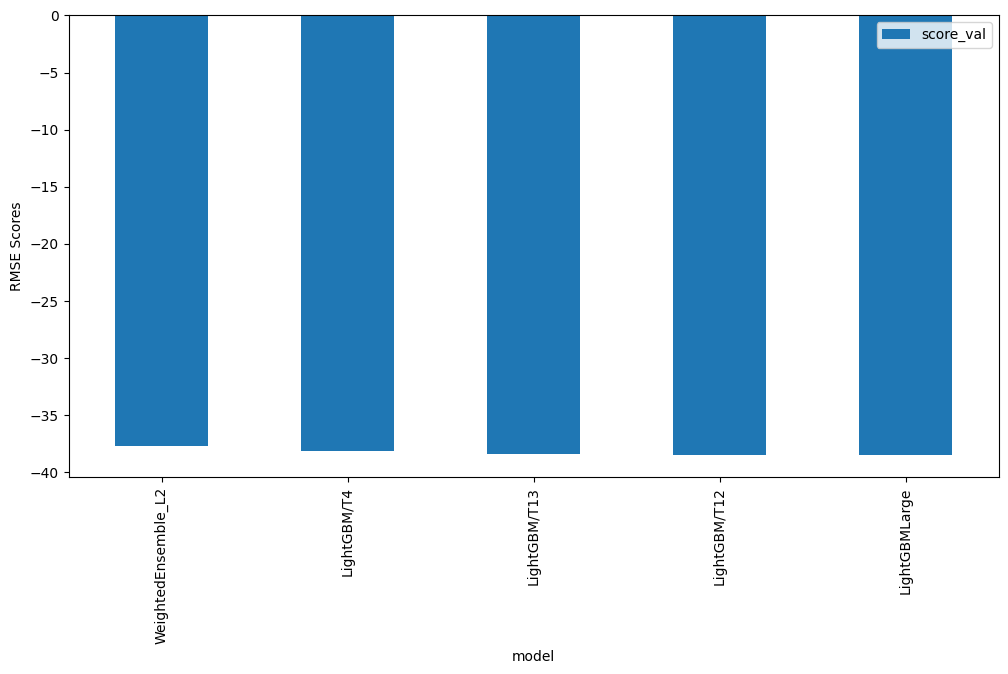

In [72]:
# Output the model's `score_val` in a bar chart to compare performance
import matplotlib.pyplot as plt
leaderboard_new_hpo_df.plot(kind="bar", x="model", y="score_val", figsize=(12, 6))
plt.ylabel("RMSE Scores")
plt.show()

In [73]:
predictions_new_hpo = predictor_new_hpo.predict(test)
predictions_new_hpo.head()

0    17.503155
1     2.853153
2     0.337806
3     0.687679
4     0.696036
Name: count, dtype: float32

In [74]:
# Describe the `predictions_new_hpo` series to see if there are any negative values
predictions_new_hpo.describe()

count    6493.000000
mean      190.041840
std       174.145859
min       -19.850374
25%        46.594200
50%       147.590363
75%       284.646484
max       938.444153
Name: count, dtype: float64

In [75]:
# How many negative values do we have?

# Rechecking the predictions in predictions_new_hpo
negative_pred_count = predictions_new_hpo.apply(lambda x: 1 if x<0 else 0)

pred_pos_count = (negative_pred_count==0).sum()
pred_neg_count = (negative_pred_count==1).sum()

print("Total predictions                :", len(predictions_new_hpo.index))
print("Total positive prediction values :", pred_pos_count)
print("Total negative prediction values :", pred_neg_count)

Total predictions                : 6493
Total positive prediction values : 6411
Total negative prediction values : 82


In [76]:
# Remember to set all negative values to zero
predictions_new_hpo[predictions_new_hpo<0] = 0    # (In case, if negative values exist in the predictions_new_hpo, set them to 0)

# Rechecking, if no predictions are less than 0
negative_pred_count = predictions_new_hpo.apply(lambda x: 1 if x<0 else 0)
pred_neg_count = (negative_pred_count==1).sum()
print(f"No. of negative predictions: {pred_neg_count}")
print("All negative values in the predictions (if any) are set to zero successfully.")

No. of negative predictions: 0
All negative values in the predictions (if any) are set to zero successfully.


In [77]:
# Same thing as train and test dataset
submission_new_hpo = pd.read_csv('sampleSubmission.csv', parse_dates = ['datetime'])
submission_new_hpo.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [78]:
# Same submitting predictions
submission_new_hpo["count"] = predictions_new_hpo
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [79]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [80]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 5

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [81]:
# Requirements: (Same settings as initial run) For AutoGluon's Tabular Predictions
eval_metric = 'root_mean_squared_error'
label = 'count'
ignored_columns = ["casual", "registered"]   # Ignored columns while training
train_data = train                           # 'casual' and 'registered' columns are already dropped/ignored
time_limit = 600                             # 10 minutes -> 600 seconds
presets = "optimize_for_deployment"          # Lighter preset options (faster)

In [83]:
import autogluon.core as ag
from autogluon.tabular import TabularPredictor
from hyperopt import hp

excluded_model_types = ['NN_TORCH']

# For GBM
gbm_options = [{'extra_trees': True,
                'num_boost_round': hp.quniform('num_boost_round', 100, 800, 1),
                'num_leaves': hp.quniform('num_leaves', 26, 66, 1),
                'ag_args': {'name_suffix': 'XT'}}, {}, 'GBMLarge']

# XT Models
xt_options = {'criterion': 'squared_error', 'ag_args': {'name_suffix': 'MSE', 'problem_types': ['regression']}}

# XGB Models
xgb_options = [{'objective': 'reg:squarederror',
                'eval_metric': 'rmse',
                'max_depth': hp.quniform('max_depth', 5, 8, 1),
                'n_estimators': hp.quniform('n_estimators', 100, 500, 1),
                'eta': 0.3,
                'subsample': 1,
                'colsample_bytree': 1}]

hyperparameters = {
    'GBM': gbm_options,
    'XT': xt_options,
    'XGB': xgb_options
}

num_trials = 20
search_strategy = 'auto'
scheduler = 'local'

hyperparameter_tune_kwargs = {
    'num_trials': num_trials,
    'scheduler': scheduler,
    'searcher': search_strategy,
}

predictor_new_hpo1 = TabularPredictor(label='count', problem_type='regression', eval_metric='root_mean_squared_error',
                                    learner_kwargs={'ignored_columns': ignored_columns}).fit(
    train_data=train,
    time_limit=time_limit,
    presets=presets,
    hyperparameters=hyperparameters,
    hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
    excluded_model_types=excluded_model_types,
    refit_full='best')

No path specified. Models will be saved in: "AutogluonModels/ag-20240429_214903"
Presets specified: ['optimize_for_deployment']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20240429_214903"
=================== System Info ===================
AutoGluon Version:  1.1.0
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sat Nov 18 15:31:17 UTC 2023
CPU Count:          2
Memory Avail:       10.08 GB / 12.67 GB (79.5%)
Disk Space Avail:   74.59 GB / 107.72 GB (69.3%)
Train Data Rows:    10886
Train Data Columns: 14
Label Column:       count
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Dropping user-specified ignored columns: ['casual', 'registered']
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    10322.77 MB
	Train Data (Original)  Memory Usage: 0.61 MB (0.0% of available 

  0%|          | 0/20 [00:00<?, ?it/s]

[1000]	valid_set's rmse: 38.8412
[1000]	valid_set's rmse: 39.722
[1000]	valid_set's rmse: 39.5199
[2000]	valid_set's rmse: 38.3691
[3000]	valid_set's rmse: 38.1532
[4000]	valid_set's rmse: 38.1416
[5000]	valid_set's rmse: 38.1845
[1000]	valid_set's rmse: 39.0485
[1000]	valid_set's rmse: 39.3696
[2000]	valid_set's rmse: 38.677
[3000]	valid_set's rmse: 38.6376
[1000]	valid_set's rmse: 38.5283
[2000]	valid_set's rmse: 38.2386
[1000]	valid_set's rmse: 39.1305
[2000]	valid_set's rmse: 38.5694
[3000]	valid_set's rmse: 38.5402
[4000]	valid_set's rmse: 38.4337
[5000]	valid_set's rmse: 38.4924
[1000]	valid_set's rmse: 38.5145
[2000]	valid_set's rmse: 38.3808
[1000]	valid_set's rmse: 40.8581
[2000]	valid_set's rmse: 39.9082
[3000]	valid_set's rmse: 39.509
[4000]	valid_set's rmse: 39.2621
[5000]	valid_set's rmse: 39.0913
[6000]	valid_set's rmse: 39.0335
[7000]	valid_set's rmse: 39.035
[8000]	valid_set's rmse: 39.07
[1000]	valid_set's rmse: 43.5792


	Ran out of time, early stopping on iteration 1504. Best iteration is:
	[1504]	valid_set's rmse: 41.827
	Stopping HPO to satisfy time limit...
Fitted model: LightGBM/T1 ...
	-38.7749	 = Validation score   (-root_mean_squared_error)
	2.86s	 = Training   runtime
	0.31s	 = Validation runtime
Fitted model: LightGBM/T2 ...
	-39.278	 = Validation score   (-root_mean_squared_error)
	2.16s	 = Training   runtime
	0.09s	 = Validation runtime
Fitted model: LightGBM/T3 ...
	-39.6569	 = Validation score   (-root_mean_squared_error)
	3.4s	 = Training   runtime
	0.41s	 = Validation runtime
Fitted model: LightGBM/T4 ...
	-38.124	 = Validation score   (-root_mean_squared_error)
	14.11s	 = Training   runtime
	2.81s	 = Validation runtime
Fitted model: LightGBM/T5 ...
	-39.5392	 = Validation score   (-root_mean_squared_error)
	1.71s	 = Training   runtime
	0.18s	 = Validation runtime
Fitted model: LightGBM/T6 ...
	-39.0408	 = Validation score   (-root_mean_squared_error)
	5.41s	 = Training   runtime
	0.58s

In [84]:
predictor_new_hpo1.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                 model  score_val              eval_metric  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L2 -37.527571  root_mean_squared_error       9.453170  41.102851                0.000786           0.021784            2       True          6
1          LightGBM/T4 -38.124006  root_mean_squared_error       2.806235  14.105927                2.806235          14.105927            1       True          1
2         LightGBM/T13 -38.369670  root_mean_squared_error       0.897946   5.201708                0.897946           5.201708            1       True          3
3         LightGBM/T12 -38.431862  root_mean_squared_error       4.686226  12.107736                4.686226          12.107736            1       True          2
4        LightGBMLarge -38.516436  root_mean_squared_error       0.441978   4.011606                0.441978           4.01

{'model_types': {'LightGBM/T4': 'LGBModel',
  'LightGBM/T12': 'LGBModel',
  'LightGBM/T13': 'LGBModel',
  'ExtraTreesMSE': 'XTModel',
  'LightGBMLarge': 'LGBModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBM/T4': -38.12400606131232,
  'LightGBM/T12': -38.431861570431245,
  'LightGBM/T13': -38.3696701247306,
  'ExtraTreesMSE': -39.584076050325685,
  'LightGBMLarge': -38.51643622165731,
  'WeightedEnsemble_L2': -37.527570702543834},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'LightGBM/T4': ['LightGBM', 'T4'],
  'LightGBM/T12': ['LightGBM', 'T12'],
  'LightGBM/T13': ['LightGBM', 'T13'],
  'ExtraTreesMSE': ['ExtraTreesMSE'],
  'LightGBMLarge': ['LightGBMLarge'],
  'WeightedEnsemble_L2': ['WeightedEnsemble_L2']},
 'model_fit_times': {'LightGBM/T4': 14.105926990509033,
  'LightGBM/T12': 12.107735633850098,
  'LightGBM/T13': 5.201708078384399,
  'ExtraTreesMSE': 5.654090642929077,
  'LightGBMLarge': 4.011605978012085,
  'WeightedEnsemble_L2

In [85]:
# Leaderboard dataframe
leaderboard_new_hpo1_df = pd.DataFrame(predictor_new_hpo1.leaderboard(silent=True))
leaderboard_new_hpo1_df

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,-37.527571,root_mean_squared_error,9.453170,41.102851,0.000786,0.021784,2,True,6
1,LightGBM/T4,-38.124006,root_mean_squared_error,2.806235,14.105927,2.806235,14.105927,1,True,1
2,LightGBM/T13,-38.369670,root_mean_squared_error,0.897946,5.201708,0.897946,5.201708,1,True,3
3,LightGBM/T12,-38.431862,root_mean_squared_error,4.686226,12.107736,4.686226,12.107736,1,True,2
4,LightGBMLarge,-38.516436,root_mean_squared_error,0.441978,4.011606,0.441978,4.011606,1,True,5
5,ExtraTreesMSE,-39.584076,root_mean_squared_error,0.620001,5.654091,0.620001,5.654091,1,True,4


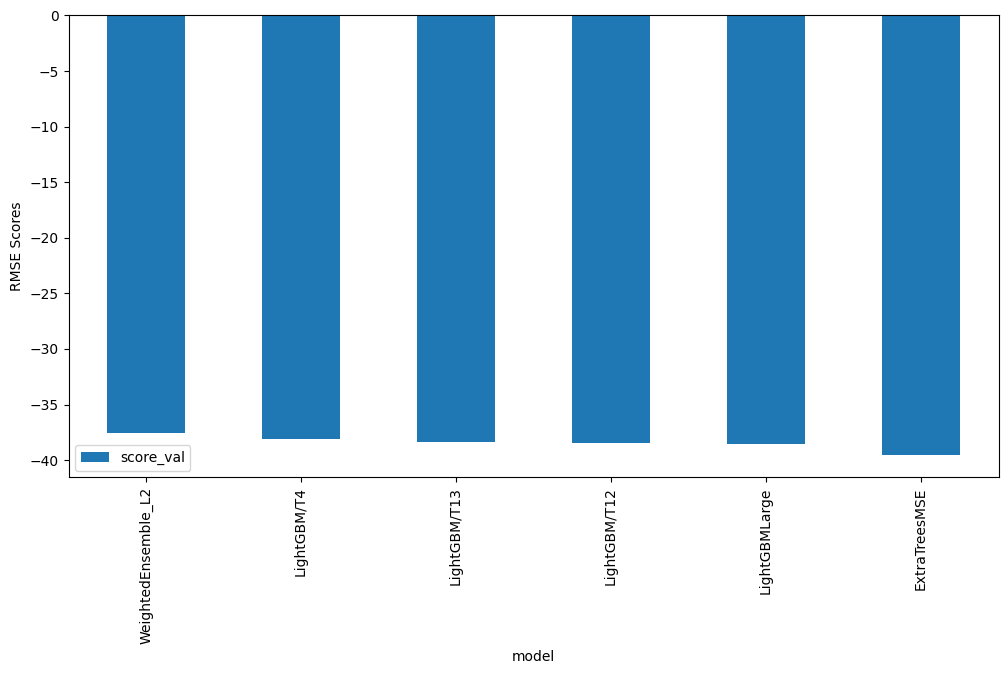

In [86]:
# Output the model's `score_val` in a bar chart to compare performance
import matplotlib.pyplot as plt
leaderboard_new_hpo1_df.plot(kind="bar", x="model", y="score_val", figsize=(12, 6))
plt.ylabel("RMSE Scores")
plt.show()

In [87]:
predictions_new_hpo1 = predictor_new_hpo1.predict(test)
predictions_new_hpo1.head()

0    16.773787
1     3.167811
2     0.840399
3     1.221464
4     1.248192
Name: count, dtype: float32

In [88]:
# Describe the `predictions_new_hpo1` series to see if there are any negative values
predictions_new_hpo1.describe()

count    6493.000000
mean      190.517670
std       173.304901
min       -15.544058
25%        47.188015
50%       149.390213
75%       284.281891
max       932.014587
Name: count, dtype: float64

In [89]:
# How many negative values do we have?

# Rechecking the predictions in predictions_new_hpo1
negative_pred_count = predictions_new_hpo1.apply(lambda x: 1 if x<0 else 0)

pred_pos_count = (negative_pred_count==0).sum()
pred_neg_count = (negative_pred_count==1).sum()

print("Total predictions                :", len(predictions_new_hpo1.index))
print("Total positive prediction values :", pred_pos_count)
print("Total negative prediction values :", pred_neg_count)

Total predictions                : 6493
Total positive prediction values : 6432
Total negative prediction values : 61


In [90]:
# Remember to set all negative values to zero
predictions_new_hpo1[predictions_new_hpo1<0] = 0    # (In case, if negative values exist in the predictions_new_hpo1, set them to 0)

# Rechecking, if no predictions are less than 0
negative_pred_count = predictions_new_hpo1.apply(lambda x: 1 if x<0 else 0)
pred_neg_count = (negative_pred_count==1).sum()
print(f"No.of negative predictions: {pred_neg_count}")
print("All negative values in the predictions (if any) are set to zero successfully.")

No.of negative predictions: 0
All negative values in the predictions (if any) are set to zero successfully.


In [91]:
# Same thing as train and test dataset
submission_new_hpo1 = pd.read_csv('sampleSubmission.csv', parse_dates = ['datetime'])
submission_new_hpo1.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [92]:
# Same submitting predictions
submission_new_hpo1["count"] = predictions_new_hpo1
submission_new_hpo1.to_csv("submission_new_hpo1.csv", index=False)

In [93]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo1.csv -m "new features with hyperparameters 1"

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [94]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [95]:
# Requirements: (Same settings as initial run) For AutoGluon's Tabular Predictions
eval_metric = 'root_mean_squared_error'
label = 'count'
ignored_columns = ["casual", "registered"]   # Ignored columns while training
train_data = train                           # 'casual' and 'registered' columns are already dropped/ignored
time_limit = 600                             # 10 minutes -> 600 seconds
presets = "optimize_for_deployment"

In [97]:
from autogluon.tabular import TabularPredictor

In [98]:
import autogluon.core as ag
from autogluon.tabular import TabularPredictor
from hyperopt import hp

excluded_model_types = ['NN_TORCH']

# For GBM
gbm_options = [{'extra_trees': True,
                'num_boost_round': hp.quniform('num_boost_round', 100, 800, 1),
                'num_leaves': hp.quniform('num_leaves', 26, 66, 1),
                'ag_args': {'name_suffix': 'XT'}}, {}, 'GBMLarge']

# XT Models
xt_options = {'criterion': 'squared_error', 'ag_args': {'name_suffix': 'MSE', 'problem_types': ['regression']}}

# XGB Models
xgb_options = [{'objective': 'reg:squarederror',
                'eval_metric': 'rmse',
                'max_depth': hp.quniform('max_depth', 5, 8, 1),
                'n_estimators': hp.quniform('n_estimators', 100, 500, 1),
                'eta': 0.3,
                'subsample': 1,
                'colsample_bytree': 1}]

# Random Forest Models
rf_options = {'criterion': 'squared_error', 'ag_args': {'name_suffix': 'MSE', 'problem_types': ['regression']}}

# KNN
knn_options = [{'weights': 'uniform', 'ag_args': {'name_suffix': 'Uniform'}},
               {'weights': 'distance', 'ag_args': {'name_suffix': 'Distance'}}]  # default

hyperparameters = {
    'GBM': gbm_options,
    'KNN': knn_options,
    'XT': xt_options,
    'XGB': xgb_options,
    'RF': rf_options
}

num_trials = 20
search_strategy = 'auto'
scheduler = 'local'

hyperparameter_tune_kwargs = {
    'num_trials': num_trials,
    'scheduler': scheduler,
    'searcher': search_strategy,
}

predictor_new_hpo2 = TabularPredictor(label='count', problem_type='regression', eval_metric='root_mean_squared_error',
                                    learner_kwargs={'ignored_columns': ignored_columns}).fit(
    train_data=train,
    time_limit=time_limit,
    presets=presets,
    hyperparameters=hyperparameters,
    hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
    excluded_model_types=excluded_model_types,
    refit_full='best')

No path specified. Models will be saved in: "AutogluonModels/ag-20240429_215717"
Presets specified: ['optimize_for_deployment']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20240429_215717"
=================== System Info ===================
AutoGluon Version:  1.1.0
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sat Nov 18 15:31:17 UTC 2023
CPU Count:          2
Memory Avail:       9.85 GB / 12.67 GB (77.7%)
Disk Space Avail:   74.31 GB / 107.72 GB (69.0%)
Train Data Rows:    10886
Train Data Columns: 14
Label Column:       count
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Dropping user-specified ignored columns: ['casual', 'registered']
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    10084.47 MB
	Train Data (Original)  Memory Usage: 0.61 MB (0.0% of available m

  0%|          | 0/20 [00:00<?, ?it/s]

[1000]	valid_set's rmse: 38.8412
[1000]	valid_set's rmse: 39.722
[1000]	valid_set's rmse: 39.5199
[2000]	valid_set's rmse: 38.3691
[3000]	valid_set's rmse: 38.1532
[4000]	valid_set's rmse: 38.1416
[5000]	valid_set's rmse: 38.1845
[1000]	valid_set's rmse: 39.0485
[1000]	valid_set's rmse: 39.3696
[2000]	valid_set's rmse: 38.677
[3000]	valid_set's rmse: 38.6376
[1000]	valid_set's rmse: 38.5283
[2000]	valid_set's rmse: 38.2386


	Ran out of time, early stopping on iteration 360. Best iteration is:
	[360]	valid_set's rmse: 46.6757
	Stopping HPO to satisfy time limit...
Fitted model: LightGBM/T1 ...
	-38.7749	 = Validation score   (-root_mean_squared_error)
	2.75s	 = Training   runtime
	0.38s	 = Validation runtime
Fitted model: LightGBM/T2 ...
	-39.278	 = Validation score   (-root_mean_squared_error)
	2.22s	 = Training   runtime
	0.11s	 = Validation runtime
Fitted model: LightGBM/T3 ...
	-39.6569	 = Validation score   (-root_mean_squared_error)
	3.09s	 = Training   runtime
	0.4s	 = Validation runtime
Fitted model: LightGBM/T4 ...
	-38.124	 = Validation score   (-root_mean_squared_error)
	12.55s	 = Training   runtime
	3.19s	 = Validation runtime
Fitted model: LightGBM/T5 ...
	-39.5392	 = Validation score   (-root_mean_squared_error)
	1.68s	 = Training   runtime
	0.18s	 = Validation runtime
Fitted model: LightGBM/T6 ...
	-39.0408	 = Validation score   (-root_mean_squared_error)
	5.16s	 = Training   runtime
	0.86s	

In [99]:
predictor_new_hpo2.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                 model  score_val              eval_metric  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L2 -37.359664  root_mean_squared_error       4.168640  23.908752                0.001436           0.058704            2       True          5
1          LightGBM/T4 -38.124006  root_mean_squared_error       3.189614  12.548770                3.189614          12.548770            1       True          1
2        LightGBMLarge -38.516436  root_mean_squared_error       0.305433   4.371591                0.305433           4.371591            1       True          4
3         LightGBM/T10 -38.559673  root_mean_squared_error       0.045892   1.188915                0.045892           1.188915            1       True          2
4        ExtraTreesMSE -39.584076  root_mean_squared_error       0.626264   5.740773                0.626264           5.74

{'model_types': {'LightGBM/T4': 'LGBModel',
  'LightGBM/T10': 'LGBModel',
  'ExtraTreesMSE': 'XTModel',
  'LightGBMLarge': 'LGBModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBM/T4': -38.12400606131232,
  'LightGBM/T10': -38.55967268294494,
  'ExtraTreesMSE': -39.584076050325685,
  'LightGBMLarge': -38.51643622165731,
  'WeightedEnsemble_L2': -37.35966432584892},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'LightGBM/T4': ['LightGBM', 'T4'],
  'LightGBM/T10': ['LightGBM', 'T10'],
  'ExtraTreesMSE': ['ExtraTreesMSE'],
  'LightGBMLarge': ['LightGBMLarge'],
  'WeightedEnsemble_L2': ['WeightedEnsemble_L2']},
 'model_fit_times': {'LightGBM/T4': 12.54876971244812,
  'LightGBM/T10': 1.1889150142669678,
  'ExtraTreesMSE': 5.7407732009887695,
  'LightGBMLarge': 4.371590614318848,
  'WeightedEnsemble_L2': 0.05870389938354492},
 'model_pred_times': {'LightGBM/T4': 3.1896140575408936,
  'LightGBM/T10': 0.045891761779785156,
  'ExtraTreesMSE': 0.62

In [100]:
# Leaderboard dataframe
leaderboard_new_hpo2_df = pd.DataFrame(predictor_new_hpo2.leaderboard(silent=True))
leaderboard_new_hpo2_df

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,-37.359664,root_mean_squared_error,4.168640,23.908752,0.001436,0.058704,2,True,5
1,LightGBM/T4,-38.124006,root_mean_squared_error,3.189614,12.548770,3.189614,12.548770,1,True,1
2,LightGBMLarge,-38.516436,root_mean_squared_error,0.305433,4.371591,0.305433,4.371591,1,True,4
3,LightGBM/T10,-38.559673,root_mean_squared_error,0.045892,1.188915,0.045892,1.188915,1,True,2
4,ExtraTreesMSE,-39.584076,root_mean_squared_error,0.626264,5.740773,0.626264,5.740773,1,True,3


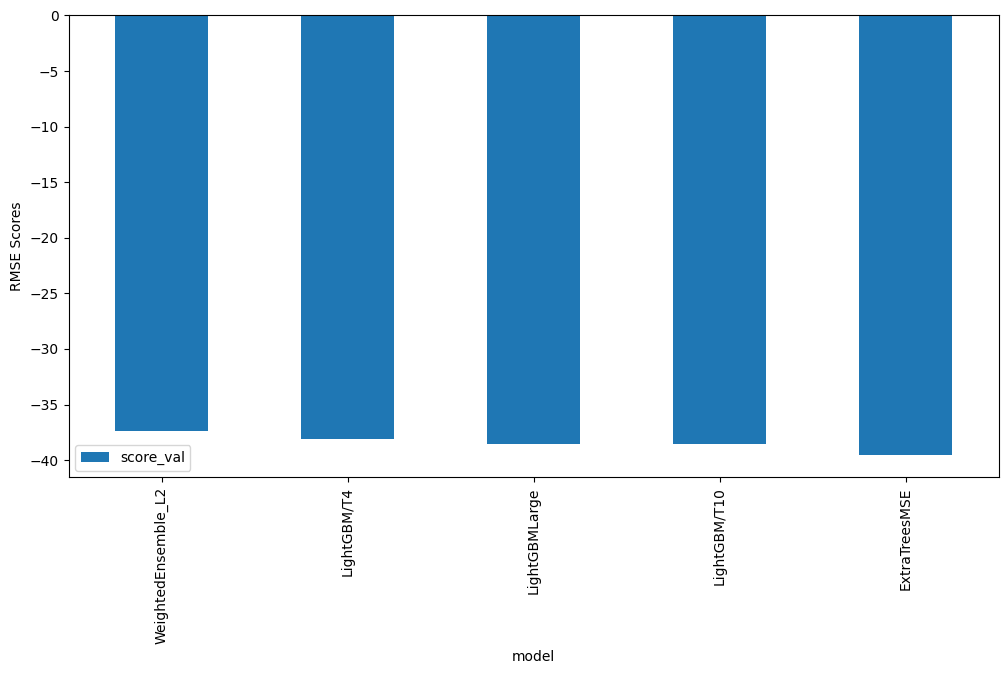

In [101]:
# Output the model's `score_val` in a bar chart to compare performance
import matplotlib.pyplot as plt
leaderboard_new_hpo2_df.plot(kind="bar", x="model", y="score_val", figsize=(12, 6))
plt.ylabel("RMSE Scores")
plt.show()

In [102]:
predictions_new_hpo2 = predictor_new_hpo2.predict(test)
predictions_new_hpo2.head()

0    17.890329
1     3.569454
2     1.448404
3     1.355666
4     1.394322
Name: count, dtype: float32

In [103]:
# Describe the `predictions_new_hpo2` series to see if there are any negative values
predictions_new_hpo2.describe()

count    6493.000000
mean      190.551193
std       173.563293
min       -18.368599
25%        46.972694
50%       148.075150
75%       285.246094
max       934.217285
Name: count, dtype: float64

In [104]:
# How many negative values do we have?

# Rechecking the predictions in predictions_new_hpo2
negative_pred_count = predictions_new_hpo2.apply(lambda x: 1 if x<0 else 0)

pred_pos_count = (negative_pred_count==0).sum()
pred_neg_count = (negative_pred_count==1).sum()

print("Total predictions                :", len(predictions_new_hpo2.index))
print("Total positive prediction values :", pred_pos_count)
print("Total negative prediction values :", pred_neg_count)

Total predictions                : 6493
Total positive prediction values : 6437
Total negative prediction values : 56


In [105]:
# Remember to set all negative values to zero
predictions_new_hpo2[predictions_new_hpo2<0] = 0    # (In case, if negative values exist in the predictions_new_hpo2, set them to 0)

# Rechecking, if no predictions are less than 0
negative_pred_count = predictions_new_hpo2.apply(lambda x: 1 if x<0 else 0)
pred_neg_count = (negative_pred_count==1).sum()
print(f"No. of negative predictions: {pred_neg_count}")
print("All negative values in the predictions (if any) are set to zero successfully.")

No. of negative predictions: 0
All negative values in the predictions (if any) are set to zero successfully.


In [106]:
# Same thing as train and test dataset
submission_new_hpo2 = pd.read_csv('sampleSubmission.csv', parse_dates = ['datetime'])
submission_new_hpo2.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [107]:
# Same submitting predictions
submission_new_hpo2["count"] = predictions_new_hpo2
submission_new_hpo2.to_csv("submission_new_hpo2.csv", index=False)

In [108]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo2.csv -m "new features with hyperparameters 2"

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [109]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 7

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [112]:
import os

if not os.path.exists('img'):
    os.makedirs('img')

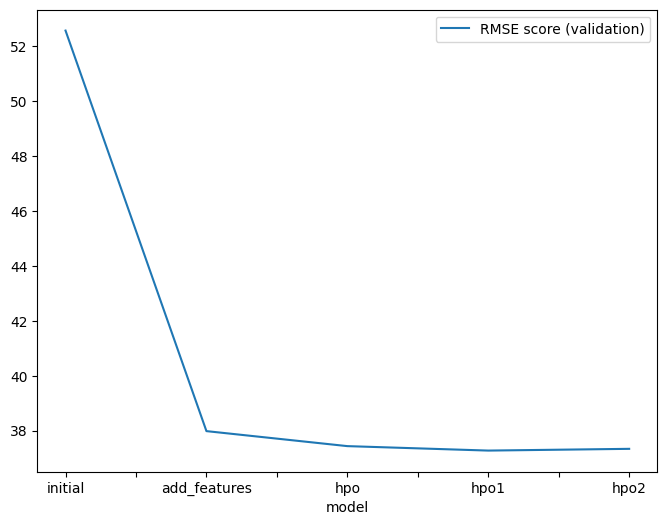

In [113]:
import os
import pandas as pd

if not os.path.exists('img'):
    os.makedirs('img')

fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo", "hpo1", "hpo2"],
        "RMSE score (validation)": [52.5564, 37.9800, 37.4340, 37.2718, 37.3353]  # Note: Actual RMSE values are considered
    }
).plot(x="model", y="RMSE score (validation)", figsize=(8, 6)).get_figure()
fig.savefig('img/model_train_score.png')

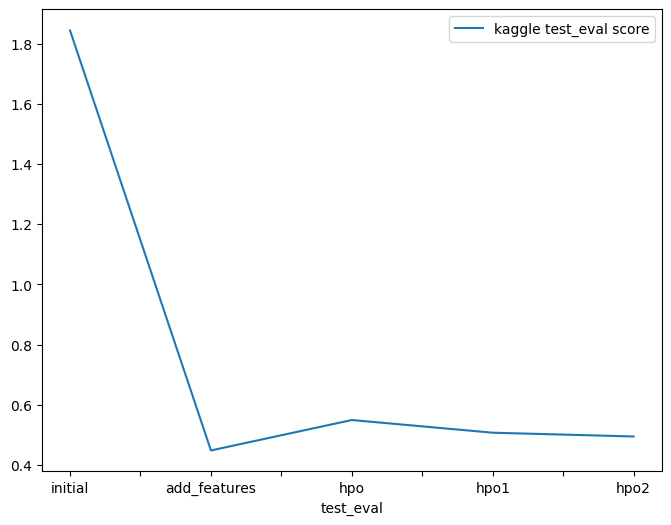

In [114]:
# Take the 3 kaggle scores (or more) and create a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo", "hpo1", "hpo2"],
        "kaggle test_eval score": [1.84484, 0.44798, 0.54914, 0.50695, 0.49440]
    }
).plot(x="test_eval", y="kaggle test_eval score", figsize=(8, 6)).get_figure()
fig.savefig('img/model_test_score.png')

In [115]:
# The 3 hyperparameters we tuned with the kaggle score as the result

# NOTE: Here the last 'hpo' based top-model is the 'hpo2' model with best Kaggle score within hyperparameter optimization category
pd.DataFrame({
    "model": ["initial", "add_features", "hpo (top-hpo-model: hpo2)"],
    "hpo1": ["prescribed_values", "prescribed_values", "Tree-Based Models: (GBM, XT, XGB & RF)"],
    "hpo2": ["prescribed_values", "prescribed_values", "KNN"],
    "hpo3": ["presets: 'high quality' (auto_stack=True)", "presets: 'high quality' (auto_stack=True)", "presets: 'optimize_for_deployment"],
    "score": [1.84484, 0.44798, 0.49440]
})

,model,hpo1,hpo2,hpo3,score
0,initial,prescribed_values,prescribed_values,presets: 'high quality' (auto_stack=True),1.84484
1,add_features,prescribed_values,prescribed_values,presets: 'high quality' (auto_stack=True),0.44798
2,hpo (top-hpo-model: hpo2),"Tree-Based Models: (GBM, XT, XGB & RF)",KNN,presets: 'optimize_for_deployment,0.49440
